In [1]:
!pip install surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 9.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=3163335 sha256=b6290aef9f1faaddf1a6506afe27a76d48f3d0c605998566934040120ccea866
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise


In [1]:
import pandas as pd
import numpy as np
from surprise import Reader, Dataset, NMF
# from google.colab import files
# uploaded = files.upload()
# import io
# df=pd.read_csv(io.BytesIO(uploaded['ratings_small.csv']))
df=pd.read_csv('ratings_small.csv')
df.head()


,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [2]:
from surprise.accuracy import rmse
from surprise.model_selection import train_test_split
reader = Reader()
data = Dataset.load_from_df(df[['userId', 'movieId', 'rating']], reader)
train, test = train_test_split(data, test_size=0.25, random_state=1)

Trying different number of factors to see if this parameter affects the performance of the model.  
The default number of factors is 100, hence we will tweak the number of factors from 1-100 to evaluate the performance.

In [3]:
import time
from collections import defaultdict

# A dictionary to store the rsme, fit time and prediction time 
nmf_dict = defaultdict(dict)
for i in range(100):
    nmf = NMF(n_factors=i+1)
    start_time = time.time()
    nmf.fit(train)
    fit_time = time.time() - start_time
    predictions = nmf.test(test)
    nmf_dict[i+1]['rmse'] = rmse(predictions)
    nmf_dict[i+1]['fit_time'] = fit_time
    nmf_dict[i+1]['prediction_time'] = time.time() - start_time - fit_time

# A dataframe to store the results
nmf_df = pd.DataFrame(nmf_dict)
nmf_df

RMSE: 1.2664
RMSE: 1.1834
RMSE: 1.1267
RMSE: 1.0720
RMSE: 1.0388
RMSE: 1.0202
RMSE: 1.0002
RMSE: 0.9880
RMSE: 0.9825
RMSE: 0.9704
RMSE: 0.9615
RMSE: 0.9568
RMSE: 0.9531
RMSE: 0.9528
RMSE: 0.9519
RMSE: 0.9551
RMSE: 0.9510
RMSE: 0.9496
RMSE: 0.9560
RMSE: 0.9503
RMSE: 0.9513
RMSE: 0.9506
RMSE: 0.9555
RMSE: 0.9571
RMSE: 0.9548
RMSE: 0.9604
RMSE: 0.9614
RMSE: 0.9598
RMSE: 0.9637
RMSE: 0.9637
RMSE: 0.9634
RMSE: 0.9688
RMSE: 0.9736
RMSE: 0.9706
RMSE: 0.9793
RMSE: 0.9757
RMSE: 0.9746
RMSE: 0.9800
RMSE: 0.9761
RMSE: 0.9828
RMSE: 0.9808
RMSE: 0.9864
RMSE: 0.9856
RMSE: 0.9896
RMSE: 0.9902
RMSE: 0.9907
RMSE: 0.9944
RMSE: 0.9946
RMSE: 0.9980
RMSE: 0.9929
RMSE: 1.0009
RMSE: 1.0049
RMSE: 1.0018
RMSE: 1.0037
RMSE: 1.0076
RMSE: 1.0091
RMSE: 1.0105
RMSE: 1.0096
RMSE: 1.0136
RMSE: 1.0144
RMSE: 1.0158
RMSE: 1.0138
RMSE: 1.0152
RMSE: 1.0164
RMSE: 1.0242
RMSE: 1.0231
RMSE: 1.0245
RMSE: 1.0229
RMSE: 1.0253
RMSE: 1.0253
RMSE: 1.0280
RMSE: 1.0299
RMSE: 1.0301
RMSE: 1.0317
RMSE: 1.0358
RMSE: 1.0347
RMSE: 1.0362

,1,2,3,4,5,6,7,8,9,10,...,91,92,93,94,95,96,97,98,99,100
rmse,1.266444,1.183417,1.126653,1.072009,1.038807,1.020241,1.000181,0.988005,0.982501,0.970399,...,1.050704,1.052584,1.053113,1.055798,1.052348,1.055726,1.056135,1.056212,1.062844,1.060871
fit_time,0.865819,0.893558,0.882041,0.968837,1.012081,0.983354,0.975498,1.001936,1.046830,1.079201,...,3.112428,3.149904,3.215932,3.299379,3.322337,3.377124,3.391315,3.512981,4.034174,3.704176
prediction_time,0.132982,0.086617,0.120589,0.094840,0.127838,0.081899,0.132139,0.084975,0.121960,0.083005,...,0.068775,0.114360,0.133236,0.083677,0.137923,0.084154,0.125430,0.077334,0.099434,0.125213


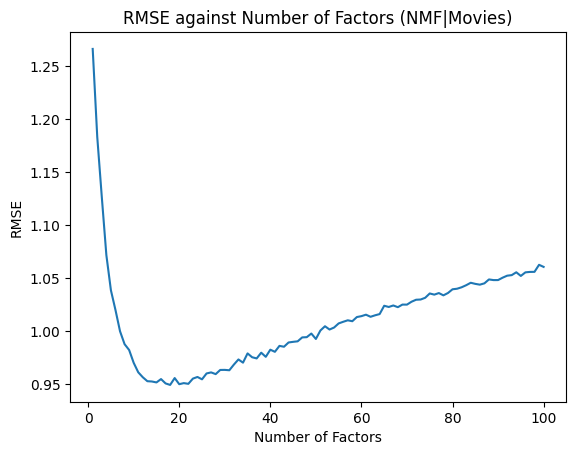

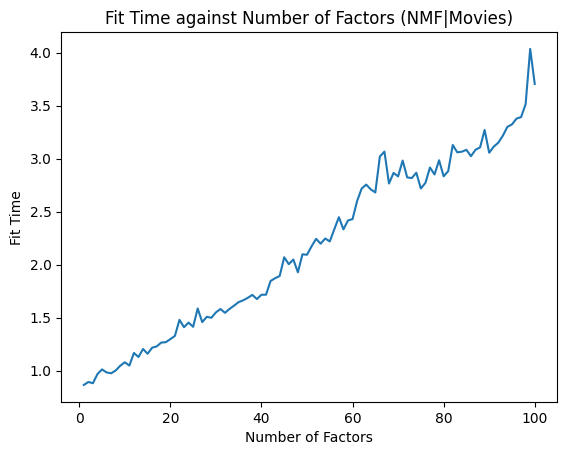

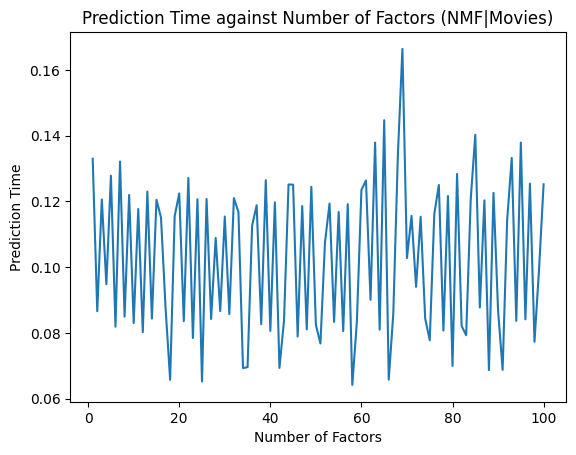

In [5]:
# Plot the RMSE, fit time and prediction time against the number of factors
import matplotlib.pyplot as plt
plt.plot(nmf_df.loc['rmse'])
plt.xlabel('Number of Factors')
plt.ylabel('RMSE')
plt.title('RMSE against Number of Factors (NMF|Movies)')
plt.show()

plt.plot(nmf_df.loc['fit_time'])
plt.xlabel('Number of Factors')
plt.ylabel('Fit Time')
plt.title('Fit Time against Number of Factors (NMF|Movies)')
plt.show()

plt.plot(nmf_df.loc['prediction_time'])
plt.xlabel('Number of Factors')
plt.ylabel('Prediction Time')
plt.title('Prediction Time against Number of Factors (NMF|Movies)')
plt.show()


We will be using the default parameters set in the NMF for our comparison between the different algorithms.

In [6]:
from surprise import NMF
import time
nmf = NMF()
begin_fit = time.time()
nmf.fit(train)
end_fit = time.time()
begin_predict = time.time()
nmf.test(test)
end_predict = time.time()
result = rmse(nmf.test(test))
row = {"Algorithm":"NMF","Fit Time":end_fit-begin_fit,"Prediction Time":end_predict-begin_predict}
print(row)

RMSE: 0.9544
{'Algorithm': 'NMF', 'Fit Time': 1.45450758934021, 'Prediction Time': 0.3647117614746094}


In [ ]:
testdf = pd.DataFrame(test)
testdf = testdf.rename(columns={
    0: "UserId",
    1: "MovieId",
    2: "Actual Rating"
})
testdf["Predicted Rating"] = -1
testdf["Error"] = -1
for index, row in testdf.iterrows():
  testdf.loc[index, 'Predicted Rating'] = nmf.predict(row["UserId"], row["MovieId"], row["Actual Rating"]).est
for index, row in testdf.iterrows():
  testdf.loc[index, 'Error'] = (abs(row["Predicted Rating"] - row["Actual Rating"]))

testdf

,UserId,MovieId,Actual Rating,Predicted Rating,Error
0,387,3801,4.0,3.346933,0.653067
1,534,507,4.0,3.871152,0.128848
2,480,8874,5.0,3.919175,1.080825
3,575,3469,4.0,4.476100,0.476100
4,214,1219,4.0,4.200861,0.200861
...,...,...,...,...,...
24996,367,2858,3.5,4.204642,0.704642
24997,654,33794,4.5,4.445635,0.054365
24998,30,903,4.0,4.305344,0.305344
24999,537,1188,5.0,3.800925,1.199075


In [ ]:
predictions = testdf.sort_values(by='Error',ascending=True)
predictions

,UserId,MovieId,Actual Rating,Predicted Rating,Error
19101,57,858,5.0,5.000000,0.000000
12882,414,1636,1.0,1.000000,0.000000
24498,654,1196,5.0,5.000000,0.000000
7198,102,2548,1.0,1.000000,0.000000
21758,78,26712,5.0,5.000000,0.000000
...,...,...,...,...,...
8733,418,778,0.5,4.589042,4.089042
20382,599,71033,0.5,4.691633,4.191633
6047,296,3552,0.5,4.824131,4.324131
24336,546,1235,0.5,5.000000,4.500000


In [ ]:
predictions.Error[predictions.Error < 0.25].count()/len(predictions)

0.2263909443622255

In [ ]:
predictions.Error.mean()

0.7359508122654415